<a href="https://colab.research.google.com/github/yjodev/Tobigs19/blob/main/W1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1주차 과제 설명
## EDA 과제
- 결측치, 이상치 검토
- 유의미한 시각화 5개 이상
- 수치형 변수 간 상관관계 파악
- 파생변수 생성

## GIT 과제
- 팀 확인
- 조장은 해당 레포를 fork + collaborators에 조원 초대
- 조장의 fork한 레포를 모두 clone
- 자신이 해당하는 조의 폴더에서 지시 내용에 따라 add, commit, push를 통해 과제 수행
- 팀장은 모든 조원이 과제를 수행하면 확인하여 마무리



# 1. 데이터 불러오기


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/투빅스/IBM_HR.csv'

#pandas read_csv로 불러오기
import pandas as pd
data = pd.read_csv(filename)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 2. 결측치 확인
- Non-Null 값이 모두 1470개로, 주어진 데이터는 모두 결측치가 없음을 확인할 수 있다. 
- 데이터 타입은 int와 object로 확인할 수 있다. 

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# 결측치 확인
data.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# 주어진 데이터에 결측치는 없다.
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#3. 시각화
- Boxplot
- Histogram
- pie chart

In [63]:
from pandas.core.groupby import DataFrameGroupBy
# Box Plot으로 이삳치 확인
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b79d34f40>,
      dtype=object)

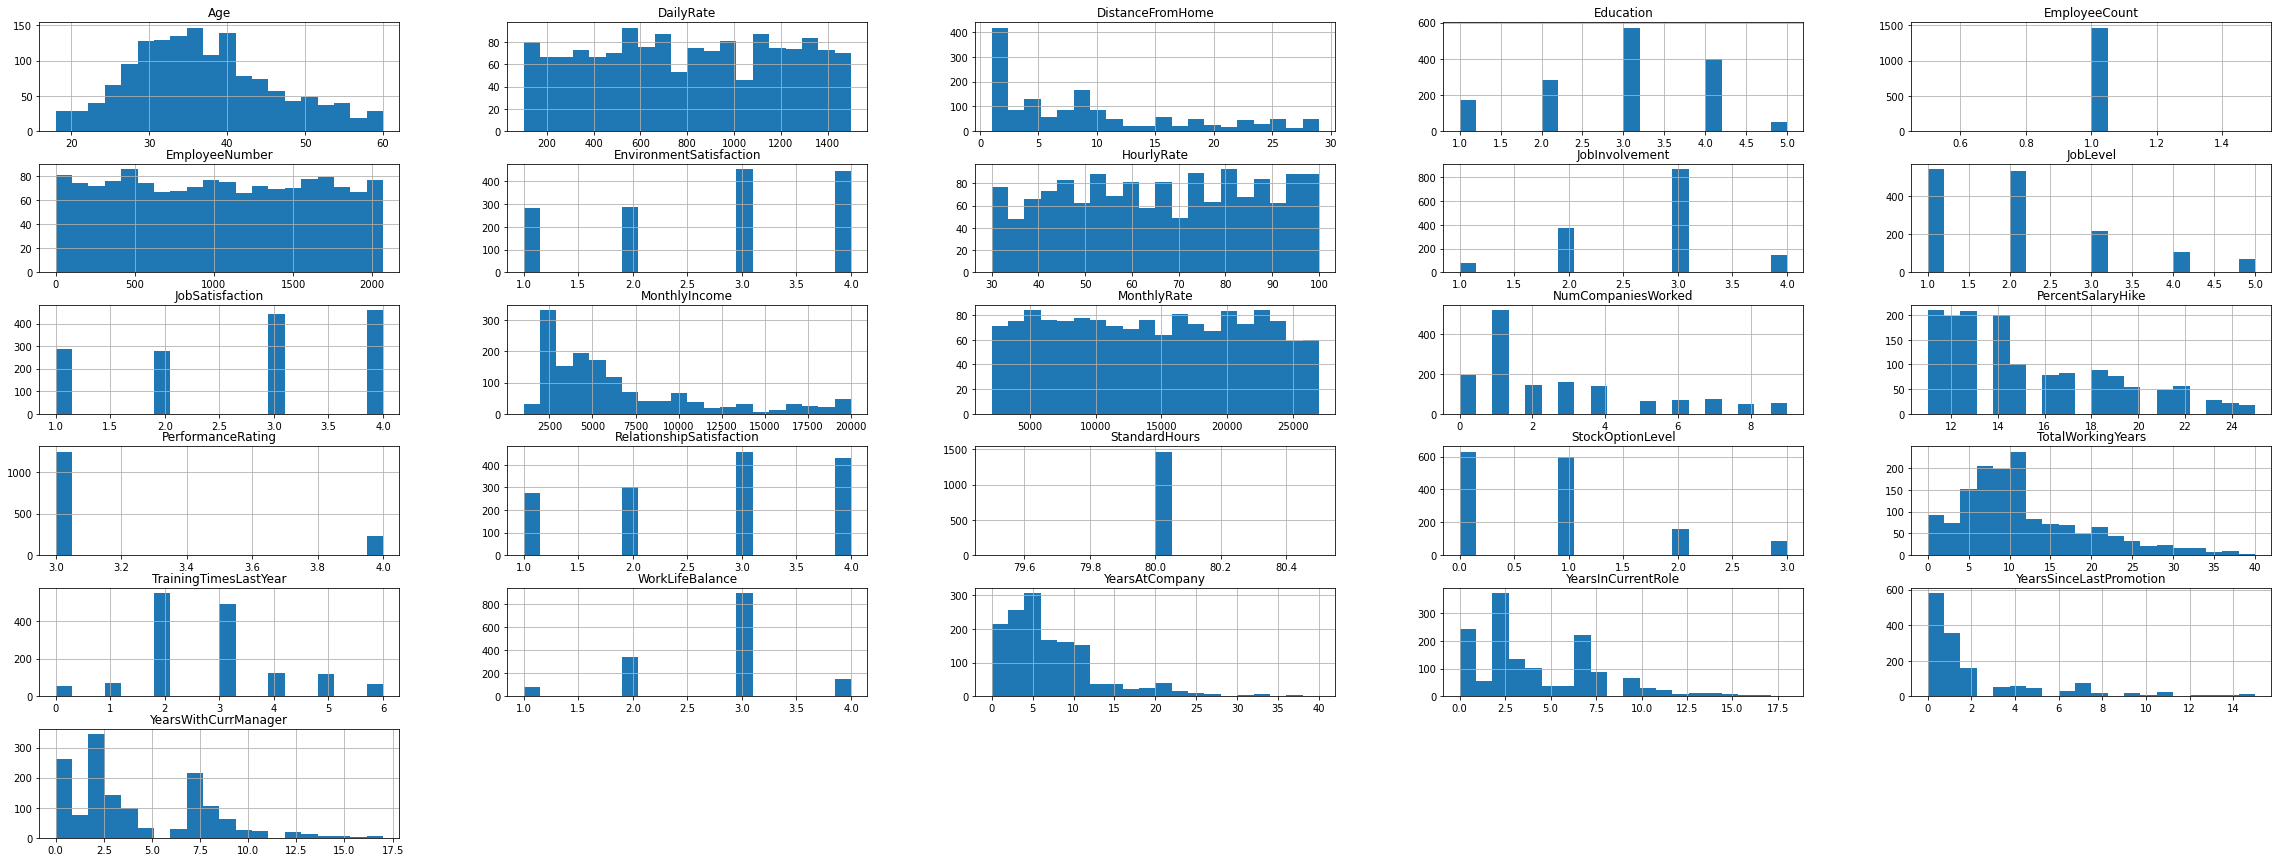

In [19]:
# 수치형 데이터 히스토그램으로 확인
# Age DailyRate DistanceFromHome Education EmployeeCount EmployeeNumber EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel
data.hist(bins=20, figsize=(40,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b75e643a0>,
      dtype=object)

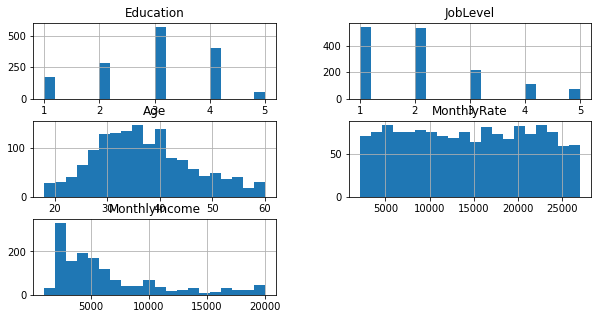

In [51]:
original_df = data[['Education','JobLevel','Age','MonthlyRate','MonthlyIncome']]
original_df.hist(bins=20, figsize=(10,5))

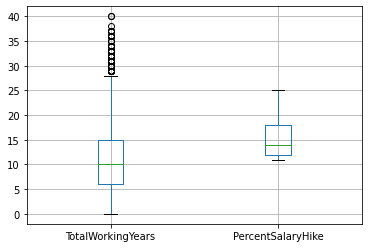

In [32]:
# 일부 수치형 column의 Boxplot 그려보기
data.boxplot(column=['TotalWorkingYears','PercentSalaryHike'])

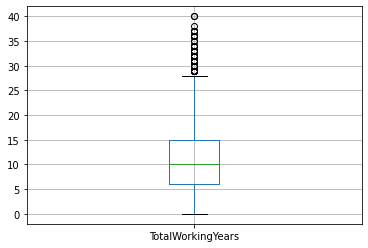

In [66]:
# TotalWrokingYears 이상치 제거 (IQR 방식)
data.boxplot(column=['TotalWorkingYears'])

In [69]:
Q1 = data[['TotalWorkingYears']].quantile(q=0.25)
Q3 = data[['TotalWorkingYears']].quantile(q=0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

TotalWorkingYears    6.0
Name: 0.25, dtype: float64
TotalWorkingYears    15.0
Name: 0.75, dtype: float64
TotalWorkingYears    9.0
dtype: float64


In [73]:
IQR_data = data[(data['TotalWorkingYears']<=Q3['TotalWorkingYears']+1.5*IQR['TotalWorkingYears']) & (data['TotalWorkingYears']<=Q3['TotalWorkingYears']-1.5*IQR['TotalWorkingYears'])]
print('data :', len(data))
print('IQR_data : ', len(IQR_data))

# 1470개 데이터 중 TotalWorkingYears의 이상치 제거 과정에서 살아남은 데이터 개수는 92개 이다. 

data : 1470
IQR_data :  92


Gender 열 시각화(pie chart)
- 남성의 비율이 60%로, 여성의 비율 40%보다 많다.


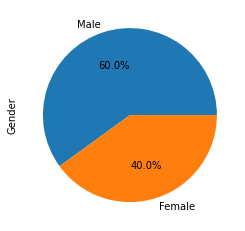

In [39]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Department 시각화(pie chart)
- R&A 부서가 65%로 가장 많으며, 그 다음은 약 30%를 차지하는 Sales부서이고, HR부서는 4%를 차지한다. 

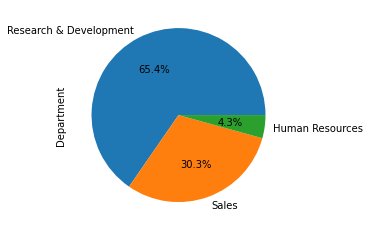

In [42]:
data['Department'].value_counts().plot.pie(autopct='%1.1f%%')

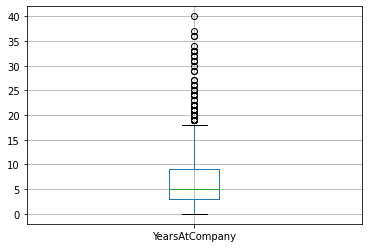

In [33]:
data.boxplot(column=['YearsAtCompany'])

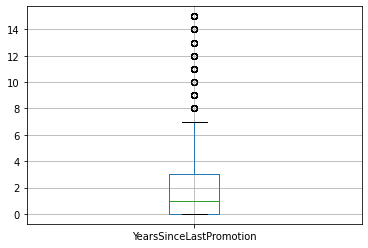

In [34]:
data.boxplot(column=['YearsSinceLastPromotion'])

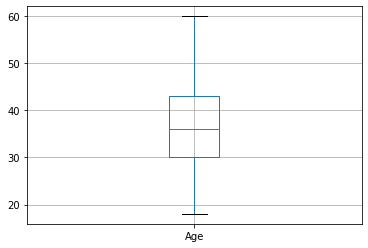

In [27]:
data.boxplot(column=['Age'])

# 4. 수치형 변수 간 상관관계 파악




In [44]:
corr = data.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


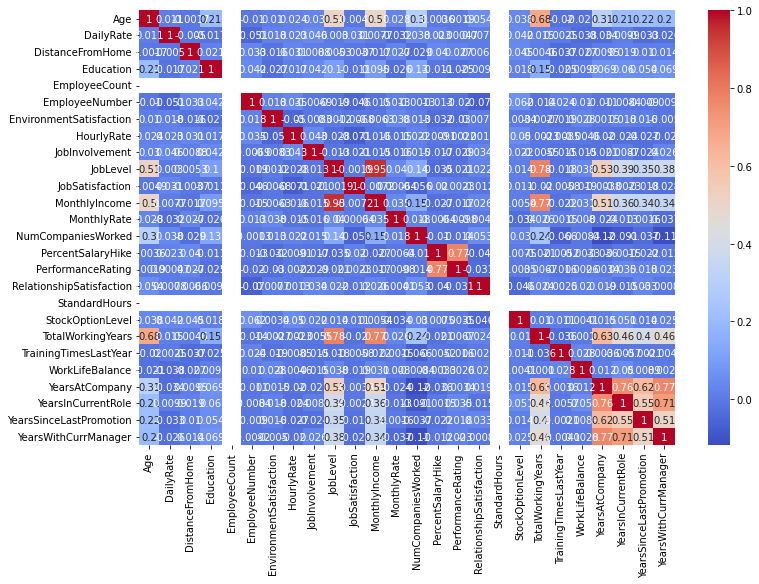

In [46]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm', annot=True)

- MonthlyIncome과 JobLevel, TotalWorkingYears는 높은 양의 상관관계를 보인다. 당연함.
- YearsAtCompany, YearsinCurrntRole, YearsSinceLastPromotion, YearsWithCurrentManager은 모두 양의 상관관계를 보인다. 당연함. 
- PerformanceRating과 PercentSalaryHike도 높은 양의 상관관계를 보인다. 좋은 고과 평가가 연봉 인상에 잘 반영되는 것으로 보인다. 

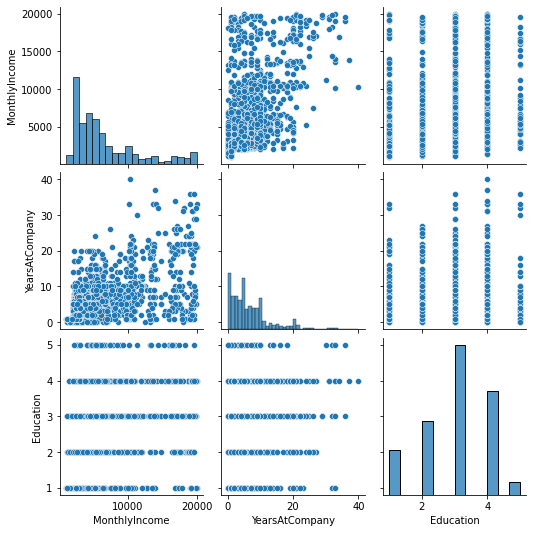

In [54]:
# 일부 컬럼 대상
sns.pairplot(data[['MonthlyIncome','YearsAtCompany','Education']])

# 5. 파생 변수 만들기
- Age를 범주화하여 새로운 열을 만든다.

In [55]:
def age_group_go(x):
    if x < 20:
        return '10_age_group'
    elif 20 <= x and x < 30:
        return '20_age_group'
    elif 30 <= x and x < 40:
        return '30_age_group'
    elif 40 <= x and x < 50:
        return '40_age_group'
    else:
        return '50_over_age_group'

In [56]:
data['Age_group'] = data['Age'].apply(age_group_go).astype('str')


In [60]:
data['Age_group'].value_counts()

30_age_group         622
40_age_group         349
20_age_group         309
50_over_age_group    173
10_age_group          17
Name: Age_group, dtype: int64

<Figure size 864x576 with 0 Axes>

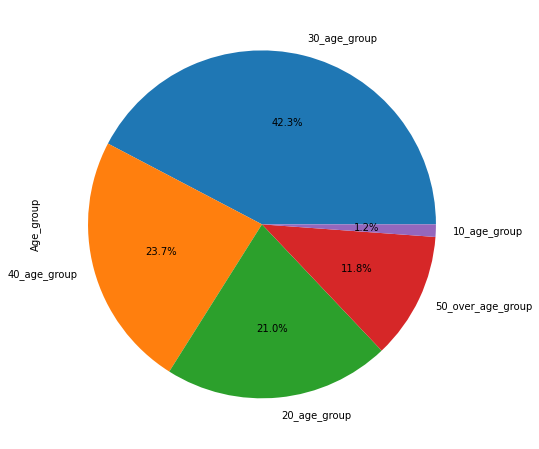

In [61]:
plt.figure(figsize=(12, 8))
data['Age_group'].value_counts().plot.pie(autopct='%1.1f%%')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


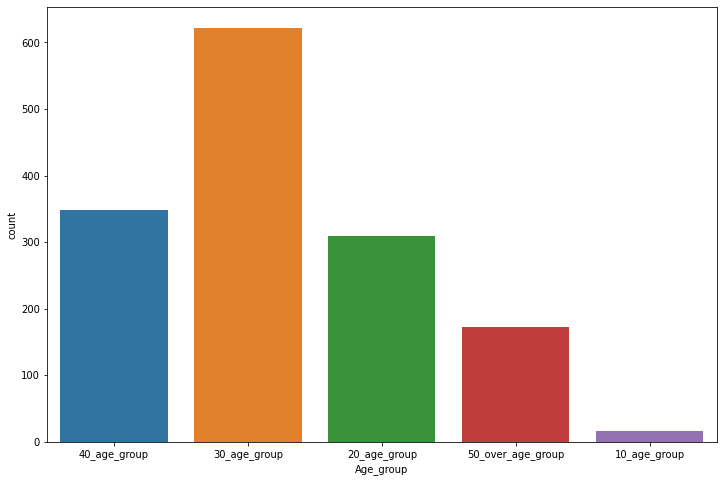

In [62]:
plt.figure(figsize=(12, 8))
sns.countplot(data['Age_group'])
plt.show()

- 30대 직장인이 가장 많다(약 40%).
- 40대와 20대는 둘다 약 20%로 비슷하지만, 40대가 약간 더 많다.
